# tabular-playground-series-mar-2021

https://www.kaggle.com/c/tabular-playground-series-mar-2021

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px

%matplotlib inline

In [3]:
with open('train.csv', 'r') as t:
    for _ in range(4):
        print(t.readline())

id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target

0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.6298580932886344,0.8553490496453626,0.7594386994154677,0.795549256871245,0.6819172514031219,0.6216718236057862,0.5921843772206821,0.7919207159113629,0.8152537462248601,0.965006328742958,0.6659151198639575,0

1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.37072710368935663,0.32892942328506936,0.3863848396544993,0.5413662314603979,0.3889824529295912,0.3577782607273347,0.6000435979273233,0.4087010629559668,0.39935257249894734,0.9274058250023683,0.4937292188969079,0

2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.5022716956789236,0.32274884251498537,0.3432547395332873,0.6163515586940255,0.7936867983255183,0.5528768777542055,0.35211338219817845,0.3888348567776837,0.41230312338993824,0.29269552318731995,0.5494523936681402,0



In [4]:
ds = pd.read_csv('train.csv', decimal=',')

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   cat0    300000 non-null  object
 2   cat1    300000 non-null  object
 3   cat2    300000 non-null  object
 4   cat3    300000 non-null  object
 5   cat4    300000 non-null  object
 6   cat5    300000 non-null  object
 7   cat6    300000 non-null  object
 8   cat7    300000 non-null  object
 9   cat8    300000 non-null  object
 10  cat9    300000 non-null  object
 11  cat10   300000 non-null  object
 12  cat11   300000 non-null  object
 13  cat12   300000 non-null  object
 14  cat13   300000 non-null  object
 15  cat14   300000 non-null  object
 16  cat15   300000 non-null  object
 17  cat16   300000 non-null  object
 18  cat17   300000 non-null  object
 19  cat18   300000 non-null  object
 20  cont0   300000 non-null  object
 21  cont1   300000 non-null  object
 

In [6]:
ds.shape

(300000, 32)

In [7]:
ds.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
target    0
dtype: int64

In [8]:
ds.head(3)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.7594386994154677,0.795549256871245,0.6819172514031219,0.6216718236057862,0.5921843772206821,0.7919207159113629,0.8152537462248601,0.965006328742958,0.6659151198639575,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.3863848396544993,0.5413662314603979,0.3889824529295912,0.3577782607273347,0.6000435979273233,0.4087010629559668,0.39935257249894734,0.9274058250023683,0.4937292188969079,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.3432547395332873,0.6163515586940255,0.7936867983255183,0.5528768777542055,0.35211338219817845,0.3888348567776837,0.41230312338993824,0.29269552318731995,0.5494523936681402,0


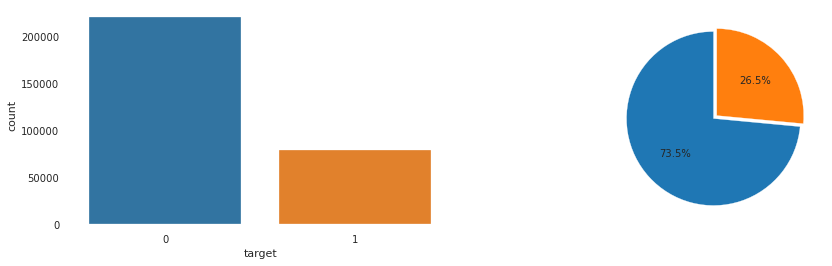

In [9]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.countplot(ds.target)
plt.subplot(122)
plt.pie(ds.target.value_counts(), autopct='%1.1f%%', explode=(0.05, 0.0), startangle=90)
plt.show()

In [10]:
ds.head().T

,0,1,2,3,4
id,0,1,2,3,4
cat0,A,A,A,A,A
cat1,I,I,K,K,I
cat2,A,A,A,A,G
cat3,B,A,A,C,B
cat4,B,E,E,E,E
cat5,BI,BI,BI,BI,BI
cat6,A,K,A,A,C
cat7,S,W,E,Y,G
cat8,Q,AD,BM,AD,Q


In [5]:
columns_numeric = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 
                   'cont6', 'cont7', 'cont8', 'cont9', 'cont10']
columns_cat = [col for col in ds.drop(['id', 'target'], axis=1).columns if col not in columns_numeric]

In [6]:
def data_to_numeric(data, columns):
    pass
    

In [7]:
ds[columns_numeric] = ds[columns_numeric].astype('float64')

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

In [15]:
# %%time
# sns.pairplot(ds[columns_numeric + ['target']], hue='target');

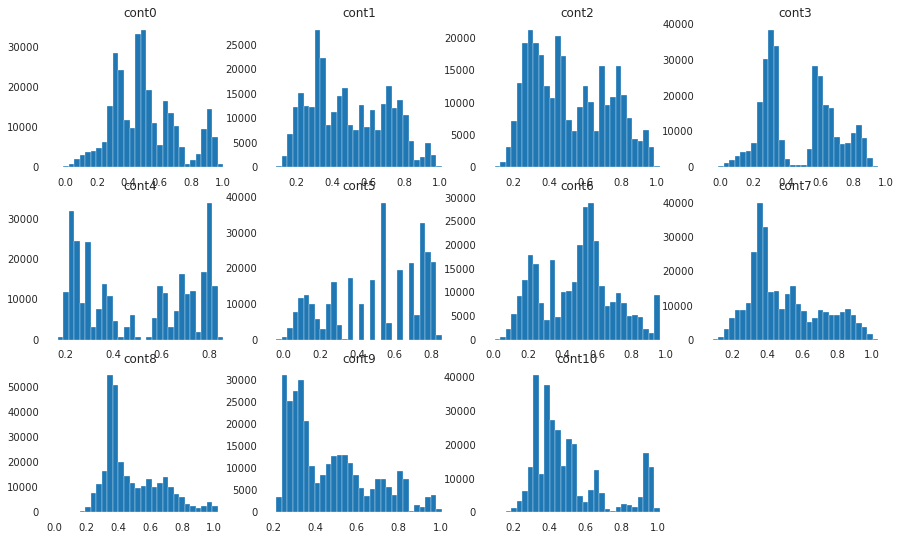

In [16]:
plt.figure(figsize=(15, 9))
for i, col in enumerate(columns_numeric):
    plt.subplot(3, 4, i+1)
    plt.hist(ds[col], bins=30)
    plt.title(col)    

------------------------------ cont9 ------------------------------


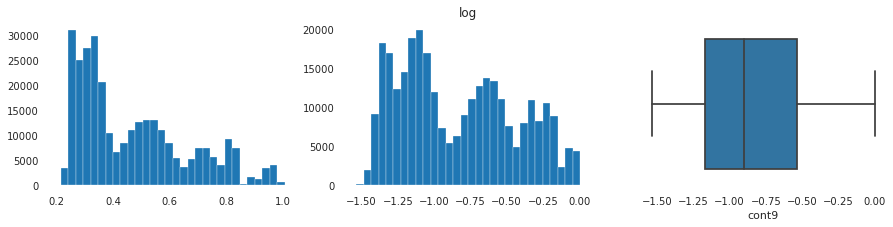

In [17]:
print('-'*30, 'cont9', '-'*30)
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.hist(ds['cont9'], bins=30)
plt.title('')
plt.subplot(132)
plt.hist(np.log(ds['cont9']), bins=30)
plt.title('log')
plt.subplot(133)
sns.boxplot(np.log(ds['cont9']))
plt.show()

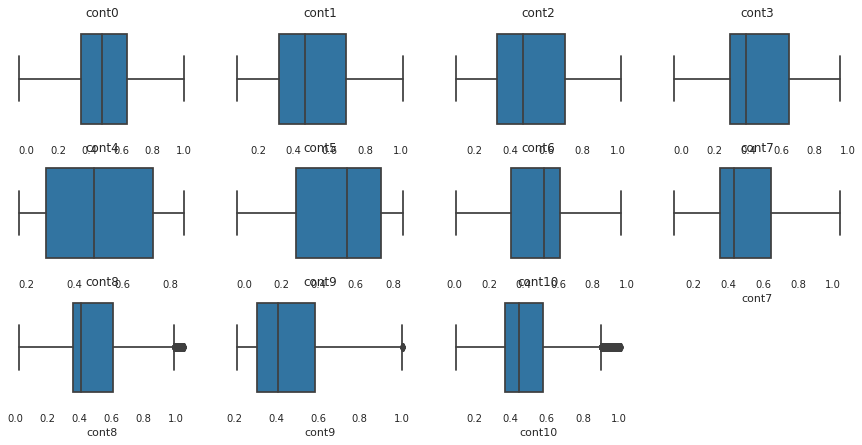

In [18]:
plt.figure(figsize=(15, 7))
for i, col in enumerate(columns_numeric):
    plt.subplot(3, 4, i+1)
    sns.boxplot(ds[col])
    plt.title(col)    

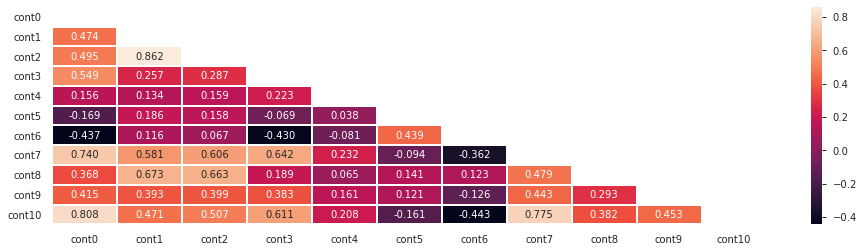

In [91]:
plt.figure(figsize=(16, 4))
mask = np.triu(np.ones_like(ds[columns_numeric].corr(), dtype=bool))
sns.heatmap(ds[columns_numeric].corr(), mask=mask, annot=True, fmt='.3f', linewidths=1);

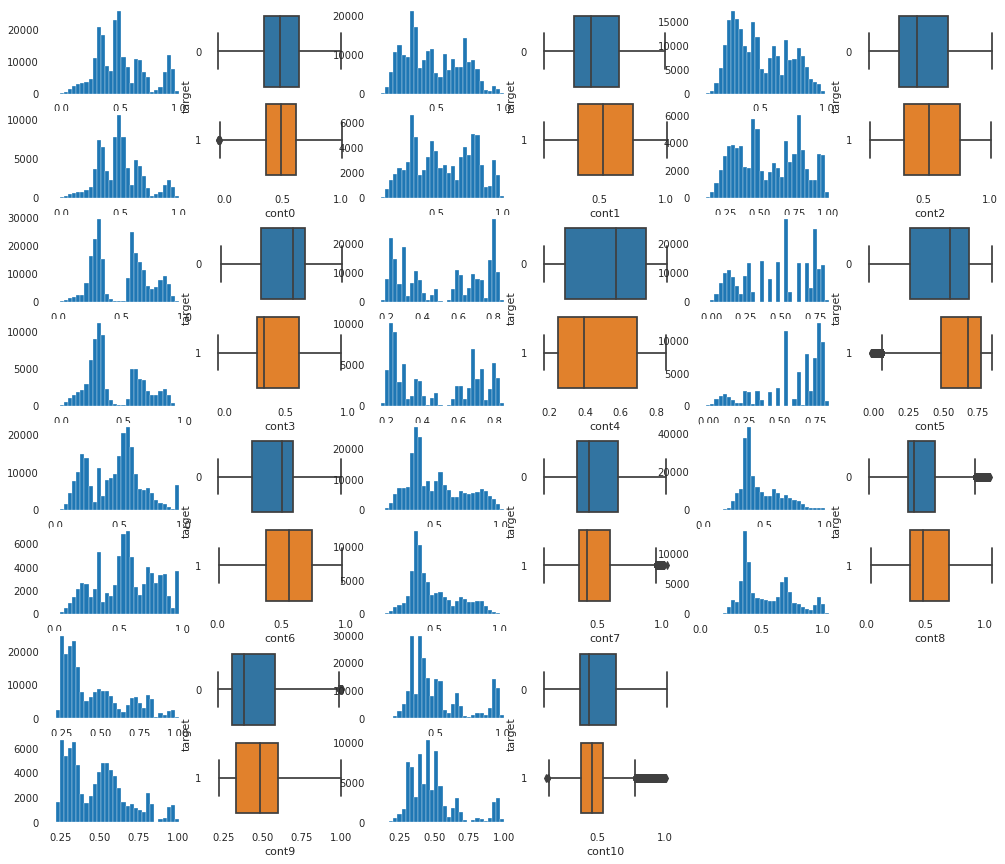

In [12]:
n = 1
m = 1
plt.figure(figsize=(17, 15))
for col in columns_numeric:
    plt.subplot(8, 6, n)
    plt.hist(ds[col][ds.target == 0], bins=30)
    plt.subplot(8, 6, n+6)
    plt.hist(ds[col][ds.target == 1], bins=30)
    plt.subplot(4, 6, m+1)
    sns.boxplot(data=ds, x=col, y='target', orient='h')
    if n in [5, 17, 29]:
        n += 8        
    else: 
        n += 2
    m += 2

plt.show()

#### 
<b>колонки, которые можно удалить, возможно они зашумляют данные    
можно попробовать удалить "cont0"   
обязательно посмотреть важность фичей.<b>


### -------------------categorical-------------------

In [34]:
len(columns_cat)

19

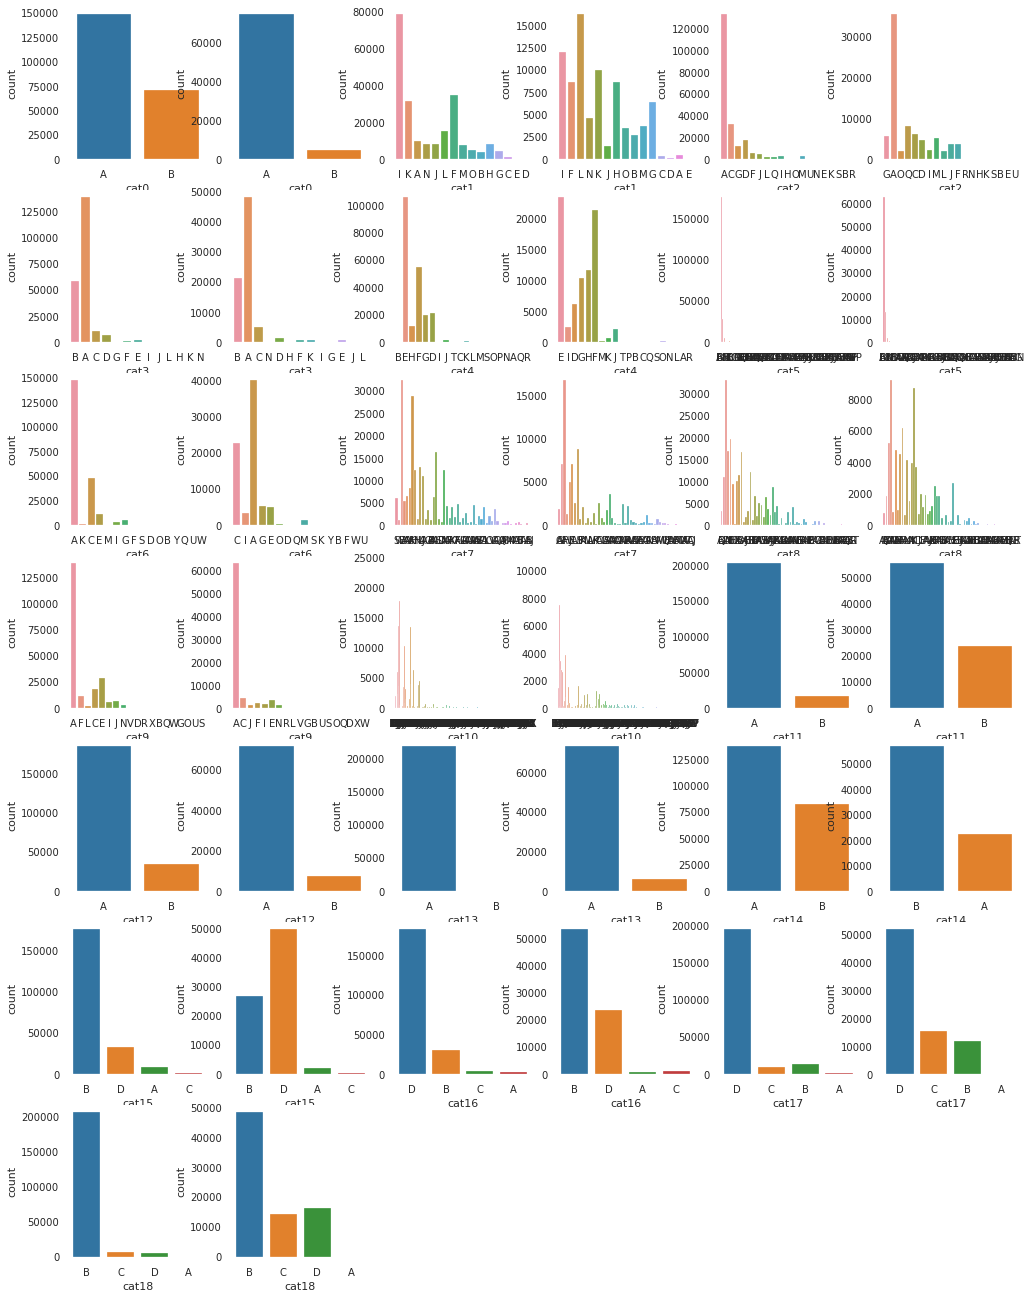

In [9]:
plt.figure(figsize=(17, 23))
n = 1
for col in columns_cat:
    plt.subplot(7, 6, n)
    sns.countplot(ds[col][ds.target == 0])
    n += 1
    plt.subplot(7, 6, n)
    sns.countplot(ds[col][ds.target == 1])
    n += 1

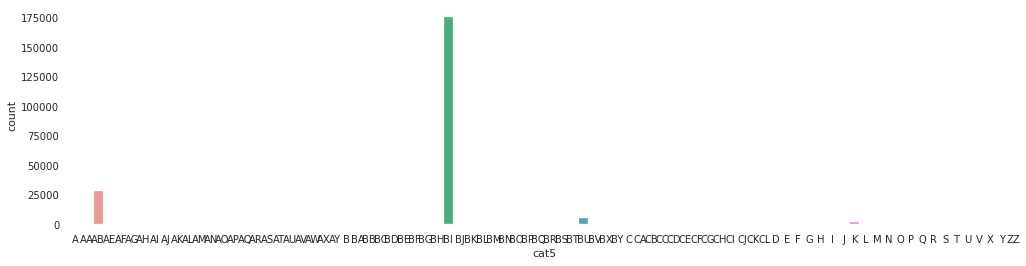

In [85]:
plt.figure(figsize=(17, 4))
sns.countplot(ds.cat5[ds.target == 0].sort_values());

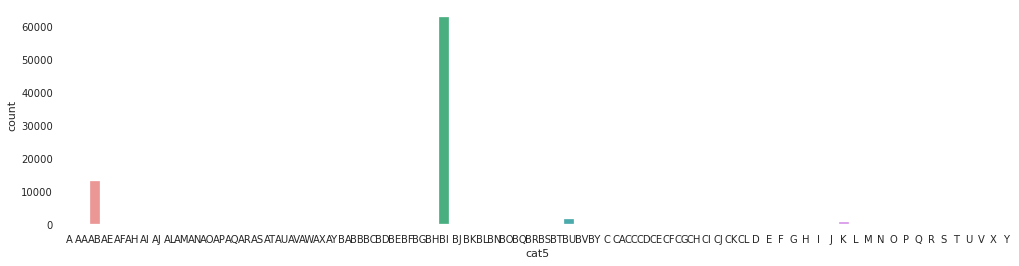

In [87]:
plt.figure(figsize=(17, 4))
sns.countplot(ds.cat5[ds.target == 1].sort_values());

In [50]:
ds.cat5.value_counts(normalize=True, ascending=False)

BI    0.795210
AB    0.138797
BU    0.022467
K     0.009043
G     0.002277
        ...   
ZZ    0.000083
B     0.000080
AG    0.000063
BP    0.000063
CB    0.000060
Name: cat5, Length: 84, dtype: float64

In [51]:
ds.cat5[ds.target == 0].value_counts(normalize=True, ascending=False)

BI    0.796041
AB    0.129333
BU    0.022708
K     0.009563
G     0.002961
        ...   
ZZ    0.000113
B     0.000109
AG    0.000086
BP    0.000086
CB    0.000082
Name: cat5, Length: 84, dtype: float64

In [52]:
ds.cat5[ds.target == 1].value_counts(normalize=True, ascending=False)

BI    0.792905
AB    0.165062
BU    0.021797
K     0.007601
AL    0.000717
        ...   
BK    0.000025
A     0.000025
BF    0.000013
BE    0.000013
BN    0.000013
Name: cat5, Length: 76, dtype: float64

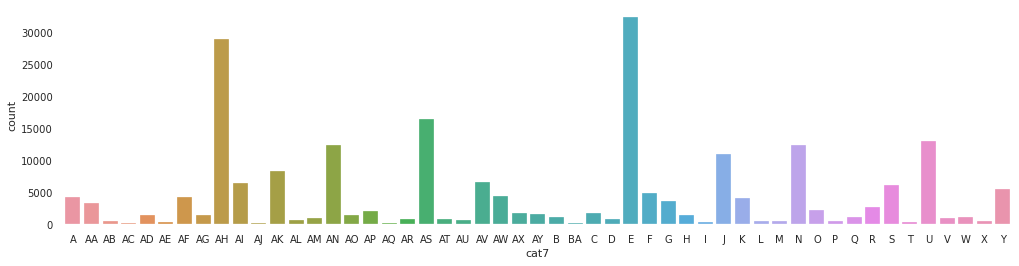

In [72]:
plt.figure(figsize=(17, 4))
sns.countplot(ds.cat7[ds.target == 0].sort_values());

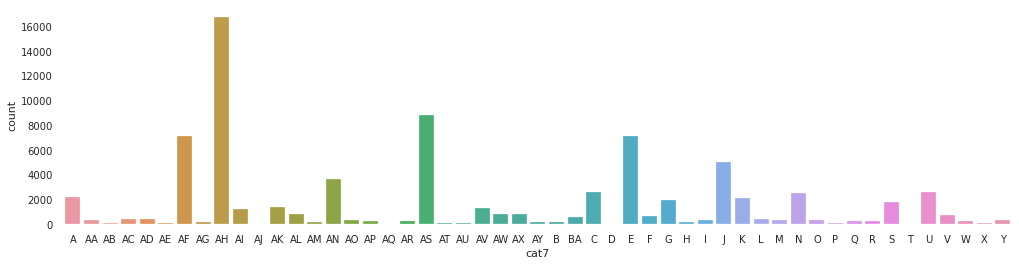

In [73]:
plt.figure(figsize=(17, 4))
sns.countplot(ds.cat7[ds.target == 1].sort_values());

In [59]:
ds.cat7[ds.target == 0].value_counts(normalize=True, ascending=False)[:10]

E     0.147248
AH    0.131750
AS    0.074599
U     0.059296
N     0.056462
AN    0.056380
J     0.050250
AK    0.037644
AV    0.030108
AI    0.029201
Name: cat7, dtype: float64

In [60]:
ds.cat7[ds.target == 1].value_counts(normalize=True, ascending=False)[:10]

AH    0.210946
AS    0.111677
E     0.089692
AF    0.089503
J     0.063591
AN    0.046098
C     0.032746
U     0.032683
N     0.031852
A     0.027951
Name: cat7, dtype: float64

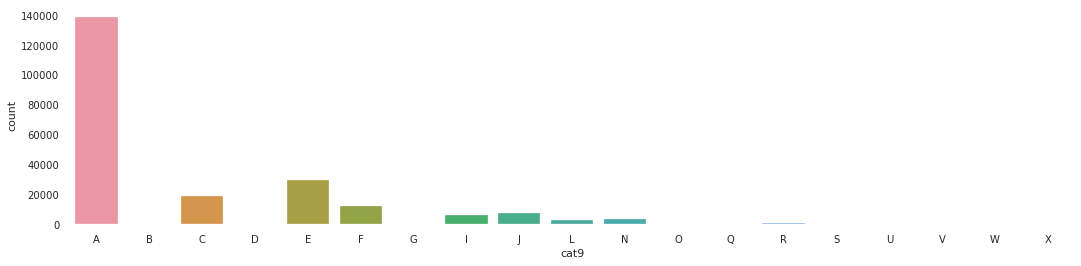

In [83]:
plt.figure(figsize=(18, 4))
sns.countplot(ds.cat9[ds.target == 0].sort_values());

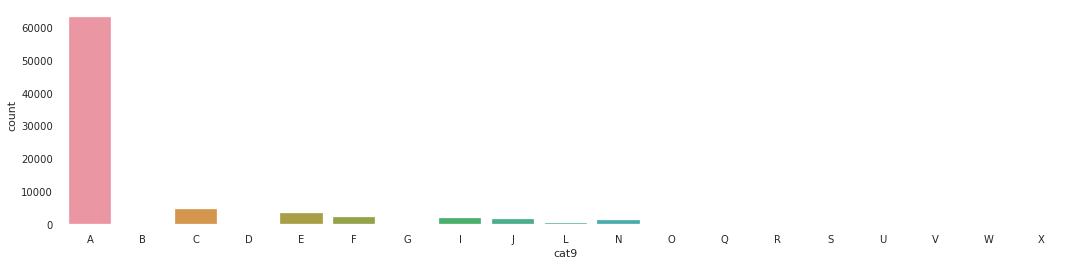

In [84]:
plt.figure(figsize=(18, 4))
sns.countplot(ds.cat9[ds.target == 1].sort_values());

In [81]:
ds.cat9[ds.target == 0].value_counts(normalize=True, ascending=False)[:12]

A    0.629218
E    0.133845
C    0.084761
F    0.055156
J    0.033731
I    0.026780
N    0.015471
L    0.011762
R    0.003029
V    0.000993
G    0.000875
D    0.000834
Name: cat9, dtype: float64

In [82]:
ds.cat9[ds.target == 1].value_counts(normalize=True, ascending=False)[:12]

A    0.795082
C    0.058733
E    0.044399
F    0.027775
I    0.025484
J    0.019418
N    0.017279
L    0.004568
R    0.002441
V    0.001774
B    0.001359
Q    0.000604
Name: cat9, dtype: float64

#### 
<b>попробовать удалить "cat5", большая доля "BI" и практически одинаковое процентное распределение данных<b>

### Резюме      
взаимосвязь непрерывных переменных очень слабая,     
у категориальных связь есть.

<b>1-я стратегия</b>       
- оставляем все переменные     
- oneHotEncoder or get_dummies      
- test -> 30%

<b>2-ая стратегия</b>     
- oneHotEncoder or get_dummies
- 'cont9' -> log
- test -> 30%

<b>3-ая стратегия</b>     
- oneHotEncoder or get_dummies
- 'cont9' -> log
- 'cont0' -> drop
- test -> 30%

<b>4-ая стратегия</b>     
- oneHotEncoder or get_dummies
- 'cont9' -> log
- 'cont0' -> drop
- 'cat5' -> drop
- test -> 30%

<b>5-ая стратегия</b>     
- oneHotEncoder or get_dummies
- 'cont9' -> log
- 'cat5' -> drop
- test -> 30%

<b>6-ая стратегия</b>     
- oneHotEncoder or get_dummies
- 'cont9' -> log
- оценить важность переменных
- test -> 30%

### Using models:     
- RF
- Tree
- SVC
- XGboost
- lightgbm
- Voting (hard/soft)
- Stacking, blending